Import modules/packages for leave one out cross validation (LOOCV).

In [441]:
import os
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

Make output directory

In [442]:
cwd = os.getcwd()
path = cwd + "\output"
if not os.path.exists(path):
    os.mkdir(path)

Load data and assign response (y) and predictor (X) variables. 

In [443]:
#change file name (down20GSE26400singleROC.txt) as needed
#file should contain ranking scores (e.g., T-score, NES, etc.) for items
#file must have column headers (1 for experimental and 0 for control samples) in row 1 and row headers in column A
df = pd.read_csv('GSE49996singlegenedataneg.txt', delimiter = "\t", low_memory=False, header=None)

tempy = list(df.iloc[0])
tempy.pop(0)
y = np.array(tempy)
y = list(y)

df = df.reindex(df.index.drop(0)).reset_index(drop=True)
labels = np.array(df[0].values.tolist())
df = df.iloc[: , 1:]
X = np.array(df.values.tolist())

In [444]:
Xsub = X[0]
Xsub = Xsub.reshape(-1, 1)
model = LogisticRegression().fit(Xsub, y)
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(Xsub)[:,1])
roc_auc = metrics.roc_auc_score(y, model.predict_proba(Xsub)[:,1])
    
print("Accuracy:", metrics.accuracy_score(y, model.predict(Xsub)))
print("AUC:", roc_auc)
print("Confusion matrix:")
print(metrics.confusion_matrix(y, model.predict(Xsub)))
print("Classification report:")
print(metrics.classification_report(y, model.predict(Xsub)))
print()

Accuracy: 0.7386363636363636
AUC: 0.8243801652892563
Confusion matrix:
[[36  8]
 [15 29]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.71      0.82      0.76        44
         1.0       0.78      0.66      0.72        44

    accuracy                           0.74        88
   macro avg       0.74      0.74      0.74        88
weighted avg       0.74      0.74      0.74        88




Time to visualize the results generated above

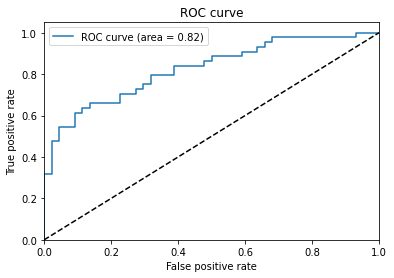

In [445]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='best')
plt.show()